# LSTM

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Define the model
model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(TIME_STEPS, FEATURES)),  # First LSTM layer
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(64, return_sequences=True),  # Second LSTM layer
    Dropout(0.2),
    LSTM(32),  # Final LSTM layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),
    Dense(13, activation='softmax')  # Output layer (adjust 13 based on your classes)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',    # Monitor validation loss
    factor=0.5,            # Reduce learning rate by half
    patience=3,            # Wait for 3 epochs before reducing
    min_lr=1e-6,           # Set a lower bound for learning rate
    verbose=1              # Print updates
)

# Train LSTM model with the callback
history_lstm = model_lstm.fit(
    X_train_seq, y_train_seq,
    epochs=50, batch_size=32,
    validation_split=0.2,
    callbacks=[lr_scheduler]  # Add the callback here
)



Epoch 1/50


D:\ICT\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


855/855 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.3211 - loss: 1.9916 - val_accuracy: 0.5655 - val_loss: 1.2793 - learning_rate: 0.0010
Epoch 2/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.5760 - loss: 1.2758 - val_accuracy: 0.6047 - val_loss: 1.0932 - learning_rate: 0.0010
Epoch 3/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.6690 - loss: 1.0149 - val_accuracy: 0.7266 - val_loss: 0.8077 - learning_rate: 0.0010
Epoch 4/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.7266 - loss: 0.8194 - val_accuracy: 0.7864 - val_loss: 0.6394 - learning_rate: 0.0010
Epoch 5/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.7741 - loss: 0.6782 - val_accuracy: 0.8215 - val_loss: 0.5203 - learning_rate: 0.0010
Epoch 6/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.7856 - loss: 0.6266 - val_accuracy: 0.8300 - val_loss: 0.5166 - learning_rate: 0.0010
Epoch 7/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8162 - loss: 0.5465

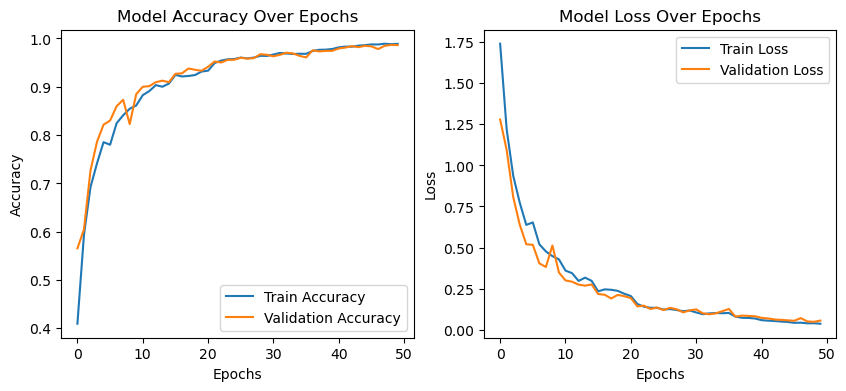

In [ ]:


# Load the saved training history
history_data = history_lstm.history

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Train Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")

plt.show()


In [ ]:
# Evaluate full models
print("Evaluating Full LSTM Model:")
evaluate_model(model_lstm, X_test_seq, y_test_seq)

Evaluating Full LSTM Model:
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Accuracy: 98.35%
F1-score: 98.34%
Inference Time: 0.554 ms/sample


(98.3499122293739, 98.33854602430819, 0.55371471983149)

In [ ]:
# Save the trained RNN model
#model_rnn.save("rnn_model.h5")  # Saves in HDF5 format
model_lstm.save("lstm_model2_50epoch.keras")
# save the history of the model
np.save("lstm_training_history_50epoch.npy", history_lstm.history)